[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


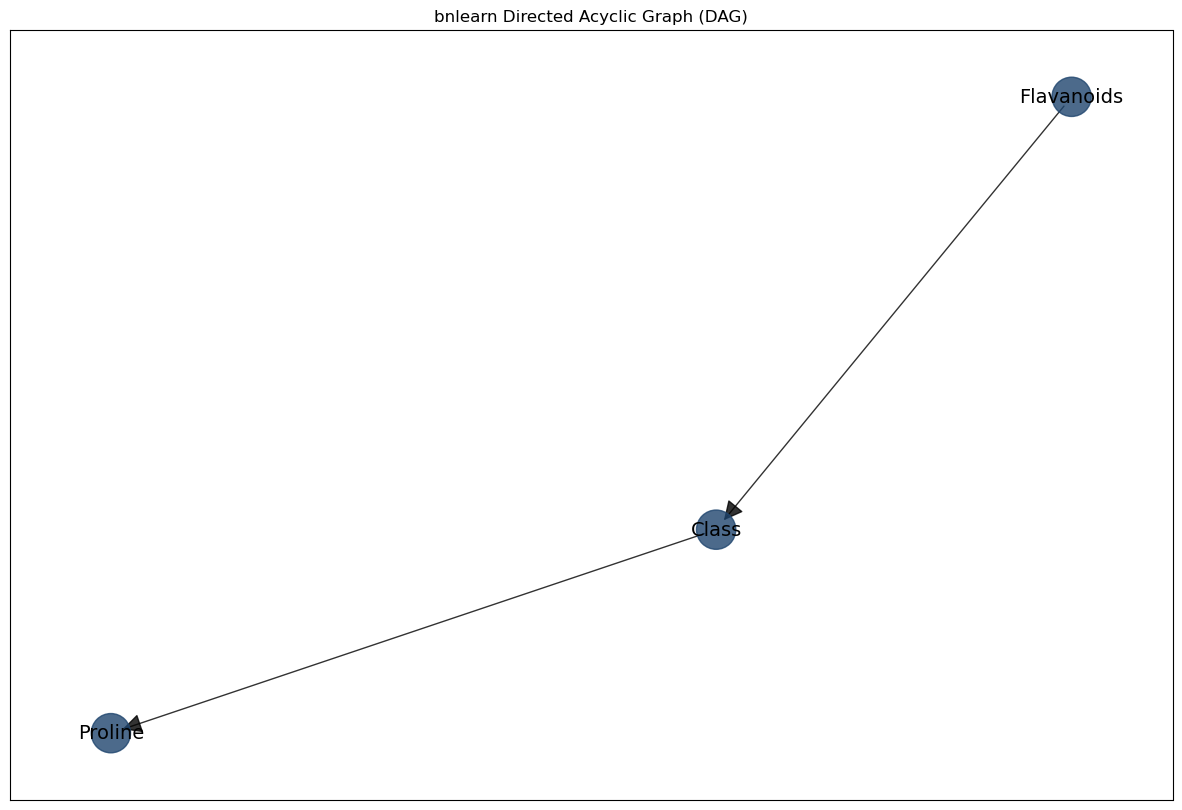

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Flavanoids:
+---------------+----------+
| Flavanoids(0) | 0.25241  |
+---------------+----------+
| Flavanoids(1) | 0.249781 |
+---------------+----------+
| Flavanoids(2) | 0.250657 |
+---------------+----------+
| Flavanoids(3) | 0.247152 |
+---------------+----------+
[bnlearn] >CPD of Class:
+------------+---------------------+-----+---------------------+
| Flavanoids | Flavanoids(0)       | ... | Flavanoids(3)       |
+------------+---------------------+-----+---------------------+
| Class(1)   | 0.28935185185185186 | ... | 0.3806146572104019  |
+------------+---------------------+-----+---------------------+
| Class(2)   | 0.3032407407407407  | ... | 0.3238770685579196  |
+------------+---------------------+-----+---------------------+
| Class(3)   | 0.4074074074074074  

100%|██████████| 13/13 [00:00<00:00, 523.48it/s]

Selected features: ['Flavanoids', 'Proline']
Accuracy: 0.9444444444444444


In [6]:
import pandas as pd
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load the data
data = pd.read_csv('wine.csv')

# Define column names
column_names = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
                'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']
data.columns = column_names

# Discretize the data
discretized_data = data.copy()
for col in data.columns[1:]:
    discretized_data[col] = pd.qcut(data[col], 4, labels=False, duplicates='drop')

# Feature Selection
X = discretized_data.drop('Class', axis=1)
y = discretized_data['Class']

selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
# print(X_new)
# Get the names of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Convert X_train and X_test back to DataFrame with proper column names
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# Combine with 'Class' column for training
train_set = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)

# Learn the structure and parameters
model = bn.structure_learning.fit(train_set, methodtype="hc")
bn.plot(model)
model_C = bn.parameter_learning.fit(model, train_set)

# Perform predictions on the test set
test_set_for_prediction = X_test_df
y_pred = bn.predict(model_C, test_set_for_prediction, variables='Class')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred['Class'])
print("Selected features:", selected_features.tolist())
print(f"Accuracy: {accuracy}")

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0 |       1 | 0.259049 |
+----+---------+----------+
|  1 |       2 | 0.386177 |
+----+---------+----------+
|  2 |       3 | 0.354774 |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0 |       1 | 0.288938 |
+----+---------+----------+
|  1 |       2 | 0.384585 |
+----+---------+----------+
|  2 |       3 | 0.326477 |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0

[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0 |       1 | 0.323272 |
+----+---------+----------+
|  1 |       2 | 0.343668 |
+----+---------+----------+
|  2 |       3 | 0.33306  |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0 |       1 | 0.357243 |
+----+---------+----------+
|  1 |       2 | 0.339091 |
+----+---------+----------+
|  2 |       3 | 0.303666 |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   Class |        p |
+====+=========+==========+
|  0 |       1 | 0.446649 |
+----+---

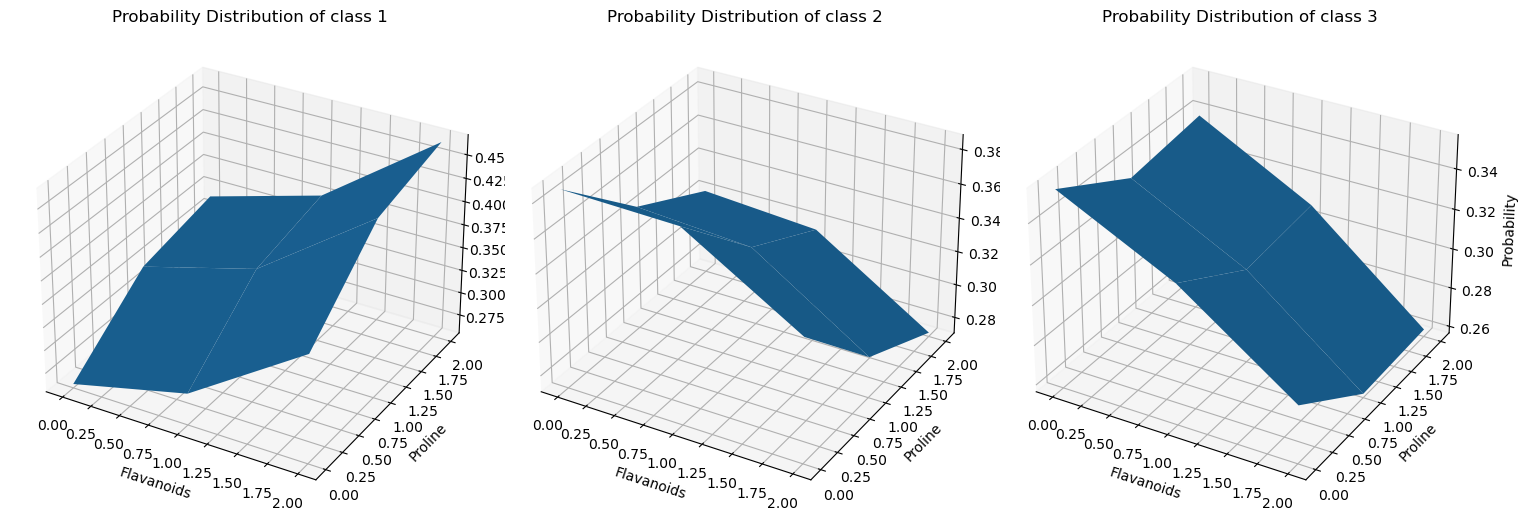

In [4]:
import matplotlib.pyplot as plt
import numpy as np

X1 = np.zeros((3,3))
X2 = np.zeros((3,3))
X3 = np.zeros((3,3))
for i in range(1,4):
    for j in range(1,4):
        predictions = bn.inference.fit(model_C, variables=['Class'], evidence ={'Flavanoids': i, 'Proline': j})
        X1[i-1][j-1], X2[i-1][j-1], X3[i-1][j-1] = predictions.values[0], predictions.values[1],predictions.values[2] 
F1, F2 = np.meshgrid([0, 1, 2], [0, 1, 2])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(131,projection='3d')
ax1.plot_surface(F1,F2,X1,label='class1')
ax1.set_xlabel('Flavanoids')
ax1.set_ylabel('Proline')
ax1.set_zlabel('Probability')
ax1.set_title('Probability Distribution of class 1')

ax2 = fig.add_subplot(132,projection='3d')
ax2.plot_surface(F1,F2,X2,label='class2')
ax2.set_xlabel('Flavanoids')
ax2.set_ylabel('Proline')
ax2.set_zlabel('Probability')
ax2.set_title('Probability Distribution of class 2')

ax3 = fig.add_subplot(133,projection='3d')
ax3.plot_surface(F1,F2,X3,label='class3')
ax3.set_xlabel('Flavanoids')
ax3.set_ylabel('Proline')
ax3.set_zlabel('Probability')
ax3.set_title('Probability Distribution of class 3')

fig.tight_layout()
plt.show()

In [ ]:
query_variable_1 = 'Class'
evidence_1 = {'Alcohol': 0, 'Malic_Acid': 2}
posterior_probabilities_case1 = bn.inference.fit(model_A, variables=[query_variable_1], evidence=evidence_1, method='exact')

# Case 2
query_variable_2 = 'Color_intensity'
evidence_2 = {'Flavanoids': 1, 'Hue': 3}
posterior_probabilities_case2 = bn.inference.fit(model_A, variables=[query_variable_2], evidence=evidence_2, method='exact')

# Case 3
query_variable_3 = 'Proline'
evidence_3 = {'Alcohol': 3, 'Total_phenols': 0}
posterior_probabilities_case3 = bn.inference.fit(model_A, variables=[query_variable_3], evidence=evidence_3, method='exact')

# Case 4
query_variable_4 = 'Magnesium'
evidence_4 = {'Ash': 2, 'Hue': 1}
posterior_probabilities_case4 = bn.inference.fit(model_A, variables=[query_variable_4], evidence=evidence_4, method='exact')

print(f"Posterior probabilities for {query_variable_1} given evidence: {posterior_probabilities_case1}")
print(f"Posterior probabilities for {query_variable_2} given evidence: {posterior_probabilities_case2}")
print(f"Posterior probabilities for {query_variable_3} given evidence: {posterior_probabilities_case3}")
print(f"Posterior probabilities for {query_variable_4} given evidence: {posterior_probabilities_case4}")